In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import ultralytics as ul

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = ul.YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.1MB/s]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import PIL

In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
import numpy as np
import torch

In [ ]:
torch.cuda.is_available()

True


0: 480x640 1 person, 73.8ms
Speed: 37.7ms preprocess, 73.8ms inference, 435.6ms postprocess per image at shape (1, 3, 480, 640)


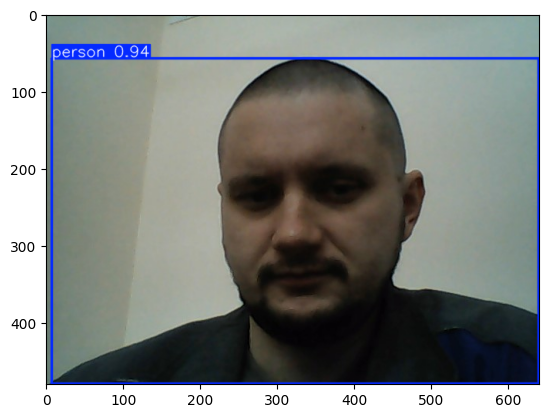

In [ ]:
model_gpu = model.to('cuda')
i = PIL.Image.open('./i.JPG', )
res = model_gpu(i)
img_i = res[0].plot()
plt.imshow(img_i[:,:,::-1])


0: 480x640 1 person, 286.4ms
Speed: 2.5ms preprocess, 286.4ms inference, 5.9ms postprocess per image at shape (1, 3, 480, 640)


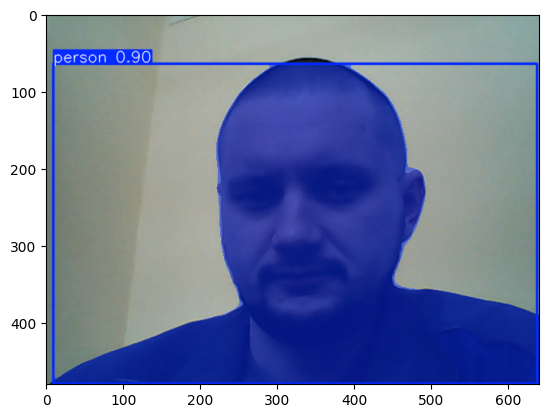

In [ ]:
i = PIL.Image.open('./i.JPG')
res = model_seg(i)
img_i = res[0].plot()
plt.imshow(img_i[:,:,::-1])


image 1/1 /content/1.jpg: 448x640 3 persons, 2 cars, 1 motorcycle, 1 bird, 203.4ms
Speed: 4.6ms preprocess, 203.4ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


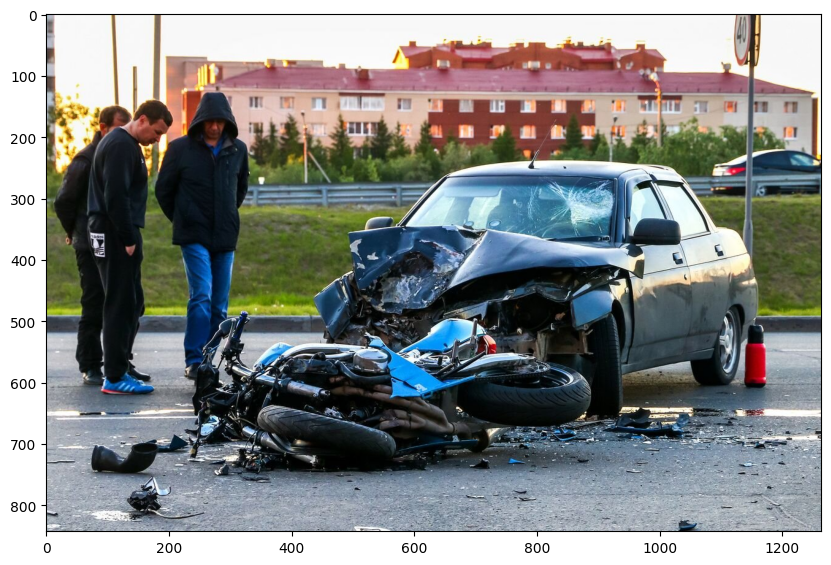

In [ ]:

img = res[0].plot()
plt.figure(figsize=(10,10))
i = PIL.Image.open('./1.jpg')
plt.imshow(i)


image 1/1 /content/1.jpg: 448x640 3 persons, 2 cars, 1 motorcycle, 1 bird, 7.9ms
Speed: 2.9ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


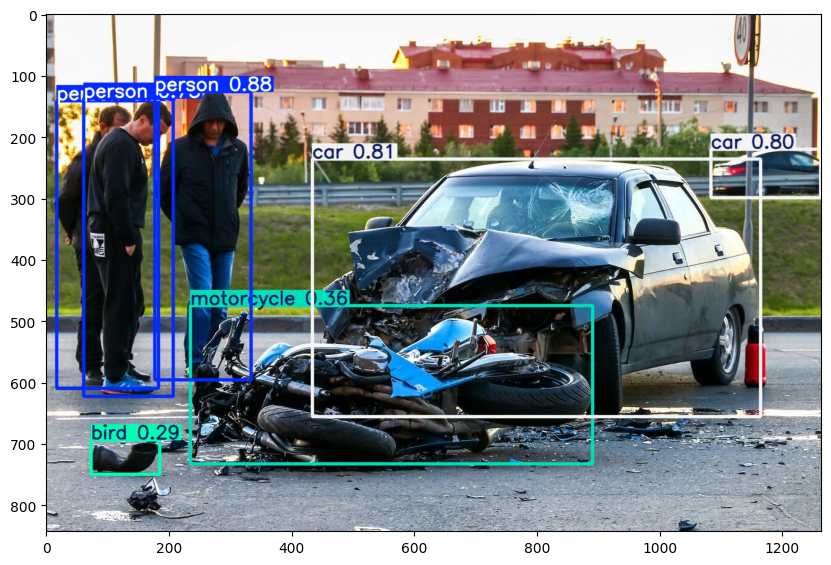

In [ ]:
res = model('./1.jpg')
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])


image 1/1 /content/1.jpg: 448x640 3 persons, 2 cars, 1 motorcycle, 1 bird, 7.6ms
Speed: 2.7ms preprocess, 7.6ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


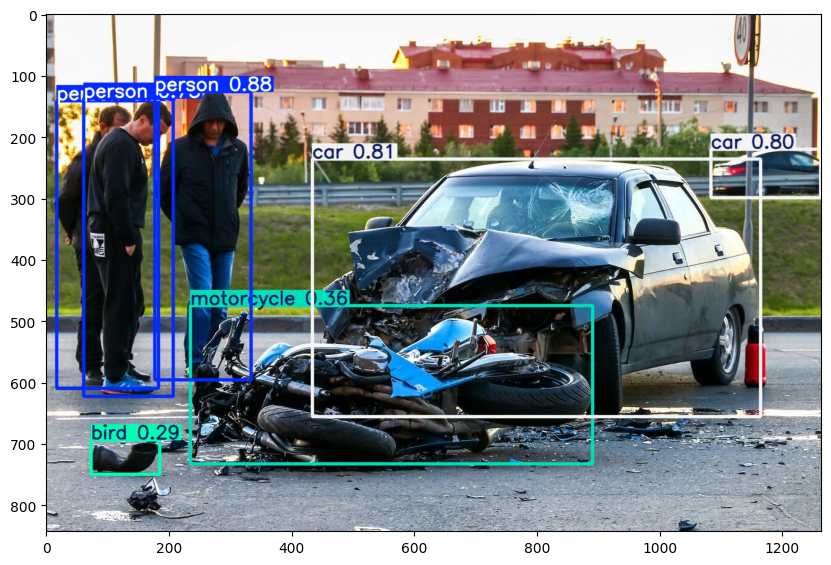

In [ ]:
res = model_gpu('./1.jpg')
img = res[0].plot()
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])


image 1/1 /content/2.jpg: 384x640 28 cars, 3 trucks, 1 traffic light, 10.9ms
Speed: 3.1ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


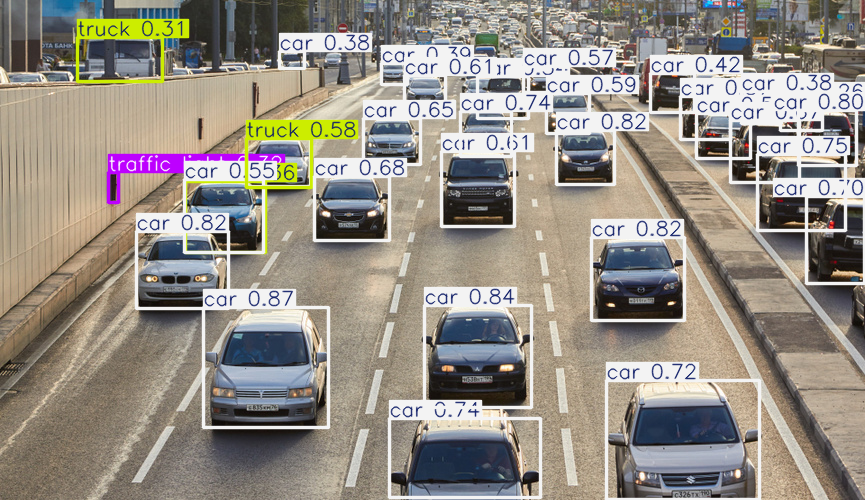

In [ ]:
res = model('./2.jpg')
res[0].show()

In [ ]:
model_seg = ul.YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 77.1MB/s]



image 1/1 /content/1.jpg: 448x640 4 persons, 2 cars, 1 motorcycle, 1 traffic light, 2 birds, 57.9ms
Speed: 13.2ms preprocess, 57.9ms inference, 491.6ms postprocess per image at shape (1, 3, 448, 640)


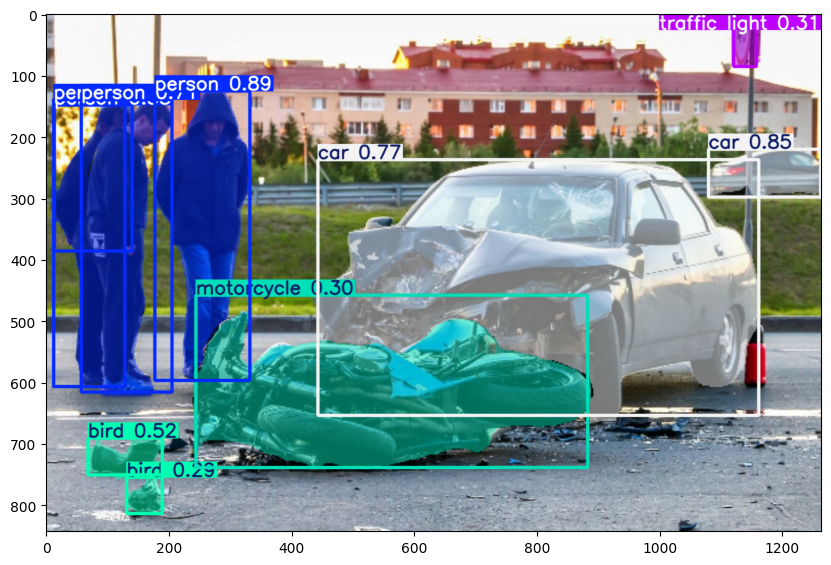

In [ ]:
res = model_seg('./1.jpg')
img_seg = res[0].plot()
plt.figure(figsize=(10,10))
plt.imshow(img_seg[:,:,::-1])

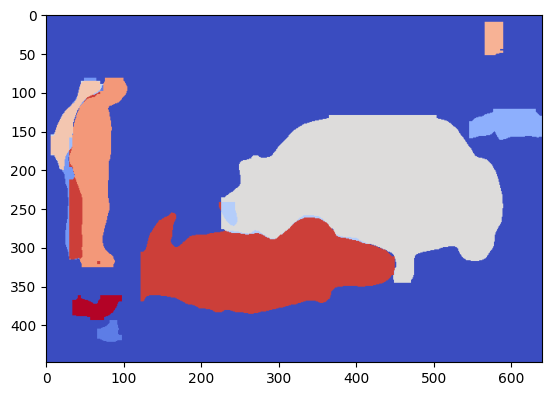

In [ ]:
combined_mask = np.zeros([448, 640], dtype=np.uint8)

for i, mask in enumerate(res[0].masks):
    combined_mask += mask.data[0].cpu().numpy().astype('uint8') * 60 * i

plt.imshow(combined_mask, cmap='coolwarm')
plt.show()